<a href="https://colab.research.google.com/github/MTBcd/Portfolio-Website/blob/main/_projet_airtraffic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pandas-profiling &> /dev/null

# Exploratory Data Analysis (EDA) of Air Traffic

In [2]:
import pandas as pd

In [3]:
traffic_df = pd.read_parquet('traffic_10lines.parquet')

In [4]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254899 entries, 3223247 to 10014282
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                254899 non-null  datetime64[ns]
 1   pax                 254899 non-null  float64       
 2   seats               250749 non-null  float64       
 3   flight_type         251168 non-null  object        
 4   flight_typename     254899 non-null  object        
 5   home_airport        254899 non-null  object        
 6   paired_airport      254899 non-null  object        
 7   home_airportname    254899 non-null  object        
 8   paired_airportname  254899 non-null  object        
 9   distance            254899 non-null  Int64         
 10  flight_number       251438 non-null  object        
 11  airline_iata        248648 non-null  object        
 12  airline_name        254813 non-null  object        
 13  scheduled_datetime  2

In [5]:
traffic_df.describe(include='all').transpose()
# all pour avoir également les chaînes de caractères

<ipython-input-5-67286ba2dda6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()
<ipython-input-5-67286ba2dda6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()


count  unique                  top    freq  \
date                  254899    2626  2019-01-02 00:00:00     165   
pax                 254899.0     NaN                  NaN     NaN   
seats               250749.0     NaN                  NaN     NaN   
flight_type           251168      19                    J  240627   
flight_typename       254899       4            Scheduled  251250   
home_airport          254899       8                  LIS  125254   
paired_airport        254899      10                  OPO   72331   
home_airportname      254899       8               Lisbon  125254   
paired_airportname    254899      10                Porto   72331   
distance            254899.0    <NA>                 <NA>    <NA>   
flight_number         251438    2663               TP 433    2332   
airline_iata          248648      90                   TP   91648   
airline_name          254813     131                  TAP   91648   
scheduled_datetime    254899  201668  2019-08-29 18:05:00       5   
direction             254899       2                    D  127622   
home_country          254899       7                   PT  125254   
paired_country        254899       8                   PT   72331   
home_countryname      254899       7             Portugal  125254   
paired_countryname    254899       8             Portugal   72331   
travel_area           254899       4             Domestic  108770   
aircraft_type         251439     168                 A320   30344   

                                  first                 last        mean  \
date                2016-01-01 00:00:00  2023-03-10 00:00:00         NaN   
pax                                 NaN                  NaN  127.082676   
seats                               NaN                  NaN  159.352879   
flight_type                         NaN                  NaN         NaN   
flight_typename                     NaN                  NaN         NaN   
home_airport                        NaN                  NaN         NaN   
paired_airport                      NaN                  NaN         NaN   
home_airportname                    NaN                  NaN         NaN   
paired_airportname                  NaN                  NaN         NaN   
distance                           <NA>                 <NA>  944.365078   
flight_number                       NaN                  NaN         NaN   
airline_iata                        NaN                  NaN         NaN   
airline_name                        NaN                  NaN         NaN   
scheduled_datetime  2016-01-01 06:10:00  2023-03-10 00:50:00         NaN   
direction                           NaN                  NaN         NaN   
home_country                        NaN                  NaN         NaN   
paired_country                      NaN                  NaN         NaN   
home_countryname                    NaN                  NaN         NaN   
paired_countryname                  NaN                  NaN         NaN   
travel_area                         NaN                  NaN         NaN   
aircraft_type                       NaN                  NaN         NaN   

                           std    min    25%     50%     75%      max  
date                       NaN    NaN    NaN     NaN     NaN      NaN  
pax                  53.050019  -11.0   88.0   140.0   168.0    582.0  
seats                47.311964    0.0  144.0   174.0   186.0    615.0  
flight_type                NaN    NaN    NaN     NaN     NaN      NaN  
flight_typename            NaN    NaN    NaN     NaN     NaN      NaN  
home_airport               NaN    NaN    NaN     NaN     NaN      NaN  
paired_airport             NaN    NaN    NaN     NaN     NaN      NaN  
home_airportname           NaN    NaN    NaN     NaN     NaN      NaN  
paired_airportname         NaN    NaN    NaN     NaN     NaN      NaN  
distance            886.540144  277.0  277.0  1109.0  1437.0  11653.0  
flight_number              NaN    NaN  

In [ ]:
!pip install pydantic-settings

!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(traffic_df)
profile.to_file('traffic_data_profile.html')

In [74]:
profile

# Visualisation

In [6]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 ['airline_name']
 .value_counts()
 )

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

In [7]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE" and pax >= 100')     #On selectione uniquement les gros volumes
 ['airline_name']
 .value_counts()
 )

Volotea                339
Smartwings             116
Transavia               90
Enter Air               77
ASL Airlines France      1
Name: airline_name, dtype: int64

In [8]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date'))

home_airport paired_airport  pax_total
date                                             
2019-01-06          NTE            FUE      456.0
2019-01-07          NTE            FUE      142.0
2019-01-13          NTE            FUE      519.0
2019-01-20          NTE            FUE      553.0
2019-01-27          NTE            FUE      528.0
...                 ...            ...        ...
2023-02-19          NTE            FUE      296.0
2023-02-25          NTE            FUE      638.0
2023-02-26          NTE            FUE      289.0
2023-03-04          NTE            FUE      584.0
2023-03-05          NTE            FUE      290.0

[293 rows x 3 columns]

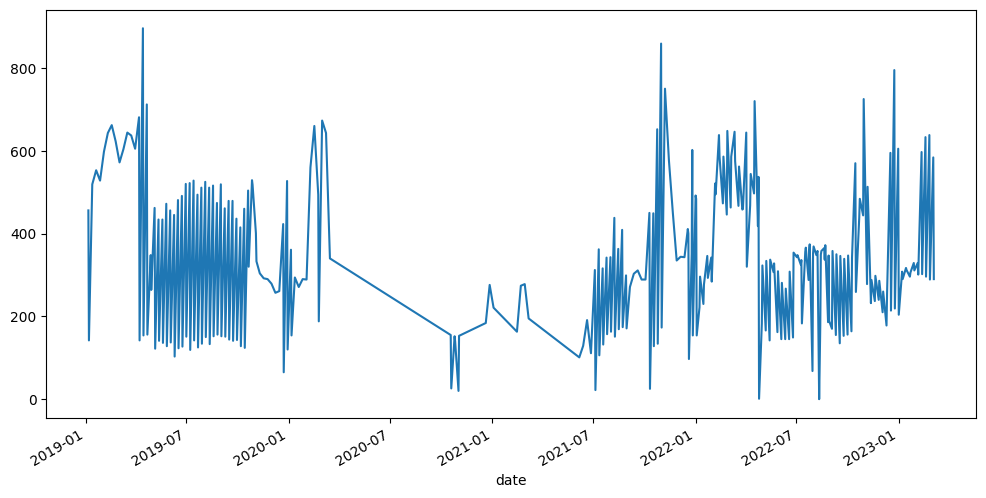

In [9]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

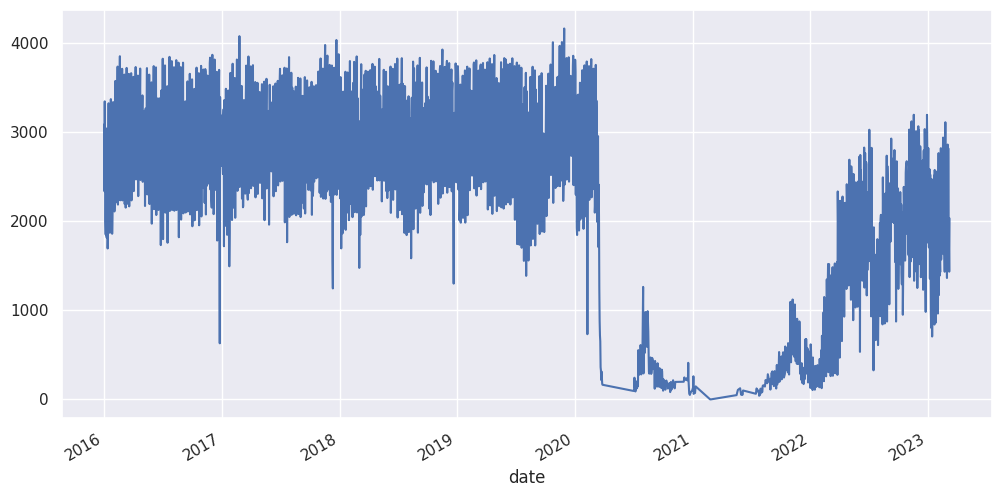

In [76]:
import seaborn as sns

sns.set()
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

In [75]:
df_lgw_ams = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index())
df_lgw_ams

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [14]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def draw_ts(df, x_col, y_col, title=None, secondary_y=False, covid_period=None,
            display=True, line_colors=None, line_width=2, marker_size=6,
            x_label=None, y_label=None, legend_labels=None):
    fig = make_subplots(specs=[[{"secondary_y": secondary_y}]])

    if title:
        fig.update_layout(title=title)

    if isinstance(y_col, str):
        y_col = [y_col]

    for i, col in enumerate(y_col):
        if line_colors:
            line_color = line_colors[i] if i < len(line_colors) else None
        else:
            line_color = None

        fig.add_trace(
            go.Scatter(x=df[x_col], y=df[col], name=legend_labels[i] if legend_labels else col,
                       line=dict(color=line_color, width=line_width),
                       marker=dict(size=marker_size)
                       ),
            secondary_y=False
        )

    if secondary_y:
        fig.update_yaxes(title_text=y_label[0] if y_label else y_col[0], secondary_y=False)
        fig.update_yaxes(title_text=y_label[1] if y_label and len(y_label) > 1 else y_col[1], secondary_y=True)

    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=8, label='8m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date',
        title_text=x_label
    )

    fig.update_yaxes(rangemode='tozero', title_text=y_label[0] if y_label else y_col[0])

    if covid_period:
        fig.add_vrect(
            x0=pd.Timestamp(covid_period[0]), x1=pd.Timestamp(covid_period[1]),
            fillcolor="Gray", opacity=0.5,
            layer="below", line_width=0
        )

    if display:
        fig.show()

    return fig


df_lgw_ams = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index())

# Chart configuration
x_col = 'date'
y_col = 'pax_total'
title='Passenger Traffic LGW-AMS'
secondary_y = False
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = 'Nombre de passager'


# Generate the chart
fig = draw_ts(df_lgw_ams, x_col, y_col, title=title, secondary_y=secondary_y,
              covid_period=covid_period, line_colors=line_colors,
              line_width=line_width, marker_size=marker_size,
              x_label=x_label, legend_labels=legend_labels)



In [15]:
# data
df_lgw_ams = (traffic_df
              .query('home_airport == "LGW" and paired_airport == "AMS"')
              .groupby(['date'])
              .agg(pax_total=('pax', 'sum'))
              .reset_index()
             )

In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# data
df_lgw_ams = (traffic_df
              .query('home_airport == "LGW" and paired_airport == "AMS"')
              .groupby(['date'])
              .agg(pax_total=('pax', 'sum'))
              .reset_index()
             )

# create traces
trace1 = go.Scatter(x=df_lgw_ams['date'], y=df_lgw_ams['pax_total'],
                    fill='tozeroy', name='LGW → AMS')
trace2 = go.Scatter(x=df_lgw_ams['date'], y=-df_lgw_ams['pax_total'],
                    fill='tozeroy', name='AMS → LGW')

# create subplot figure
fig = make_subplots(rows=1, cols=1)

# add traces to subplot figure
fig.add_trace(trace1)
fig.add_trace(trace2)

# update layout
fig.update_layout(title='Passenger Traffic LGW-AMS',
                  xaxis_title='Date',
                  yaxis_title='Passenger Traffic',
                  hovermode='x unified')

# update legend
fig.update_traces(showlegend=True)
fig.update_layout(legend=dict(
    orientation='h',
    yanchor="bottom",
    y=-0.3,
    xanchor="center",
    x=0.5,
    font=dict(size=12),
    bgcolor='rgba(0,0,0,0)'
))

# show plot
fig.show()


In [17]:
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from typing import Union, List, Optional

def draw_ts_multiple(df: pd.DataFrame, v1: Union[str, List[str]], v2: Optional[str] = None,
                     prediction: Optional[str] = None, date: str = 'date',
                     secondary_y: bool = True, covid_start: Optional[str] = None,
                     covid_end: Optional[str] = None, display: bool = True,
                     moving_avg_window: Optional[int] = None) -> go.Figure:
    """Draw time series on multiple y axes, with COVID period option.

    Args:
    - df (pd.DataFrame): Time series dataframe (one line per date, series in columns).
    - v1 (str or list[str]): Name or list of names of the series to plot on the first y-axis.
    - v2 (str): Name of the series to plot on the second y-axis (default: None).
    - prediction (str): Name of the predicted series displayed with a dotted line (default: None).
    - date (str): Name of the date column (default: 'date').
    - secondary_y (bool): Use a secondary y-axis if v2 is used (default: True).
    - covid_start (str): Start date of the COVID-19 period (default: None).
    - covid_end (str): End date of the COVID-19 period (default: None).
    - display (bool): Display the figure (default: True).
    - moving_avg_window (int): Window size for computing the moving average (default: None).

    Returns:
    - fig (plotly.graph_objs._figure.Figure): Plotly figure.

    Notes:
    Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
    Or use `display=False`.
    """
    if isinstance(v1, str):
        v1 = [v1]
    if v2:
        y_axis_titles = [f'{v}: V1' for v in v1] + ['V2']
    else:
        y_axis_titles = [f'V1: {v}' for v in v1]

    layout = {
        'title': '<br>'.join(y_axis_titles),
        'xaxis': {
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 3, 'label': '3m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 8, 'label': '8m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 12, 'label': '1Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 24, 'label': '2Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 36, 'label': '3Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 58, 'label': '4Y', 'step': 'month', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            'rangeslider': {'visible': True},
            'type': 'date'
        }
    }

    fig = make_subplots(specs=[[{"secondary_y": secondary_y}]], shared_xaxes=True)
    fig.update_layout(layout)

    for i, v in enumerate(v1):
        fig.add_trace(go.Scatter(x=df[date], y=df[v], name=f'V1.{i}'), secondary_y=False)

        if moving_avg_window is not None:
            moving_avg = df[v].rolling(window=moving_avg_window, min_periods=1).mean()
            fig.add_trace(go.Scatter(x=df[date], y=moving_avg, name=f'{v} Moving Avg.'), secondary_y=False)

            std = df[v].rolling(window=moving_avg_window, min_periods=1).std()
            upper_bound = moving_avg + 2 * std
            lower_bound = moving_avg - 2 * std
            fig.add_trace(go.Scatter(x=df[date], y=upper_bound, name=f'{v} Upper Bound', line={'dash': 'dash'}), secondary_y=False)
            fig.add_trace(go.Scatter(x=df[date], y=lower_bound, name=f'{v} Lower Bound', line={'dash': 'dash'}), secondary_y=False)

    if v2:
        fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
        fig['layout']['yaxis2']['showgrid'] = False
        fig.update_yaxes(rangemode='tozero')
        fig.update_layout(margin=dict(t=125 + 30 * (len(v1) - 1)))

    if prediction:
        fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

    if covid_start and covid_end:
        fig.add_vrect(
            x0=pd.Timestamp(covid_start),
            x1=pd.Timestamp(covid_end),
            fillcolor='Gray',
            opacity=0.5,
            layer='below',
            line_width=0
        )

    if display:
        pyoff.iplot(fig)

    return fig



In [18]:

df_lgw_ams = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index())


# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic LGW-AMS'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']

# Generate the chart
fig = draw_ts_multiple(df_lgw_ams, v1=passenger_column, date=date_column, v2=None,
                       prediction=None, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)

In [19]:
nte_fue_df = (traffic_df
              .query('home_airport == "NTE" and paired_airport == "FUE"')
              .groupby(['home_airport', 'paired_airport', 'date'])
              .agg(pax_total=('pax', 'sum')).reset_index())



# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic NTE-FUE'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']

# Generate the chart
fig = draw_ts_multiple(nte_fue_df, v1=passenger_column, date=date_column, v2=None,
                       prediction=None, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)



# Prophet model (facebook)

## Facebook Prophet
**Facebook Prophet** is a procedure for forecasting univariate time series data based on an additive model where non-linear trends are modeled using an autoregressive integrated moving average (ARIMA) model, and seasonal components are modeled using Fourier series.

**Additive Model**:
Prophet models time series data as the sum of three components:
- **Trend**: The trend component represents the long-term overall upward or downward movement in the data.
- **Seasonality**: The seasonality component captures the periodic patterns in the data, such as daily, weekly, or yearly variations.
- **Noise**: The noise component represents the irregular fluctuations in the data that are not captured by the trend or seasonality components.

**Autoregressive Integrated Moving Average (ARIMA)**:
Prophet uses an ARIMA model to model the trend component of the time series data. An ARIMA model is a statistical model that is commonly used for forecasting time series data. It consists of three parameters:
- **p**: The number of lagged values of the time series that are used to predict the current value (autoregressive terms).
- **d**: The number of times that the time series data has been differenced to remove any linear trend.
- **q**: The number of lagged values of the forecast errors that are used to predict the current forecast error (moving average terms).

**Seasonal Components**:
Prophet uses Fourier series to model the seasonal components of the time series data. A Fourier series is a mathematical series used to represent periodic functions.

**Mathematical Formulas**:
The mathematical formulas for the Prophet model are as follows:

**Trend Component**:
The trend component is modeled using an ARIMA model:

\begin{align*}
y_t = \mu + \theta_1 y_{t-1} + \theta_2 y_{t-2} + ... + \theta_p y_{t-p} + \varepsilon_t
\end{align*}

where:
- $y_t$ is the value of the time series at time $t$
- $\mu$ is the mean of the time series
- $\theta_1, \theta_2, ..., \theta_p$ are the AR coefficients
- $\varepsilon_t$ is the noise term

**Seasonality Component**:
The seasonality component is modeled using Fourier series:

\begin{align*}
s_t = \varphi_1 \cos\left(\frac{2\pi t}{T_s}\right) + \varphi_2 \sin\left(\frac{2\pi t}{T_s}\right) + ... + \varphi_q \cos\left(2\pi q\left(\frac{t}{T_s} + \varphi_q\right)\right)
\end{align*}

where:
- $s_t$ is the seasonal component at time $t$
- $T_s$ is the period of the seasonality
- $\varphi_1, \varphi_2, ..., \varphi_q$ are the Fourier coefficients
- $\varphi_q$ is the phase shift

**Overall Model**:
The overall model is represented by the equation:

\begin{align*}
y_t = \mu + s_t + \varepsilon_t
\end{align*}

where:
- $y_t$ is the value of the time series at time $t$
- $\mu$ is the mean of the time series
- $s_t$ is the seasonal component at time $t$
- $\varepsilon_t$ is the noise term


In [20]:
import pandas as pd

In [21]:
def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) ->  pd.DataFrame:
  """exctract route dataframe from traffic dataframe from home airport to paired airport
  Args:
  - traffic_df(pd.DataFrame): traffic dataframe
  - homeAirport(str): IATA code from home airport
  - pairAirport (str): IATA code from paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df = (traffic_df
        .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport,paired=pairedAirport))
        .groupby(['home_airport', 'paired_airport', 'date'])
        .agg(pax_total=('pax', 'sum'))
        .reset_index()
        )
  return _df

In [22]:
generate_route_df(traffic_df ,"LGW","AMS")

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [23]:
!pip install prophet &> /dev/null

In [24]:
from prophet import Prophet

def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
    """Extracts route dataframe from traffic dataframe from home airport to paired airport.

    Args:
    - traffic_df(pd.DataFrame): traffic dataframe
    - homeAirport(str): IATA code from home airport
    - pairAirport (str): IATA code from paired airport

    Returns:
    - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
    """
    route_df = (traffic_df
        .query(f'home_airport == "{homeAirport}" and paired_airport == "{pairedAirport}"')
        .groupby(['home_airport', 'paired_airport', 'date'])
        .agg(pax_total=('pax', 'sum'))
        .reset_index()
    )
    return route_df




In [25]:
# Extract data for the specific route
route_df = generate_route_df(traffic_df, "LGW", "AMS")

# Rename columns for compatibility with Prophet
route_df = route_df.rename(columns={'date':'ds', 'pax_total':'y'})

# Create a Prophet instance for the baseline model
baseline_model = Prophet()

# Train the model on the data for the specific route
baseline_model.fit(route_df)

# Create a dataframe for future predictions
future_df = baseline_model.make_future_dataframe(periods=365)

# Generate forecasts for the future period
forecast = baseline_model.predict(future_df)


import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from typing import Union, List, Optional


# Extract data for the specific route
df_lgw_ams = generate_route_df(traffic_df, "LGW", "AMS")

# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic LGW-AMS'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']

# Generate the chart
fig = draw_ts_multiple(df_lgw_ams, v1=passenger_column, date=date_column, v2=None,
                       prediction=None, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=False, moving_avg_window=7)

# Add forecast data to the chart
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Prévisions'))

# Update the figure layout
fig.update_layout(
    title=title,
    xaxis_title=x_label,
    yaxis_title='Nombre de passagers',
    legend_title_text='Légende',
    hovermode='x',
    legend=dict(
        x=1,
        y=0,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='black'
        ),
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

# Show the chart
pyoff.iplot(fig)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3orl3so5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmk0iasok/3sfvl3th.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9697', 'data', 'file=/tmp/tmpmk0iasok/3orl3so5.json', 'init=/tmp/tmpmk0iasok/3sfvl3th.json', 'output', 'file=/tmp/tmpmk0iasok/prophet_modelr83a_oxe/prophet_model-20240129092623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Codes to used on streamlit

  0%|          | 0/10 [00:00<?, ?it/s]

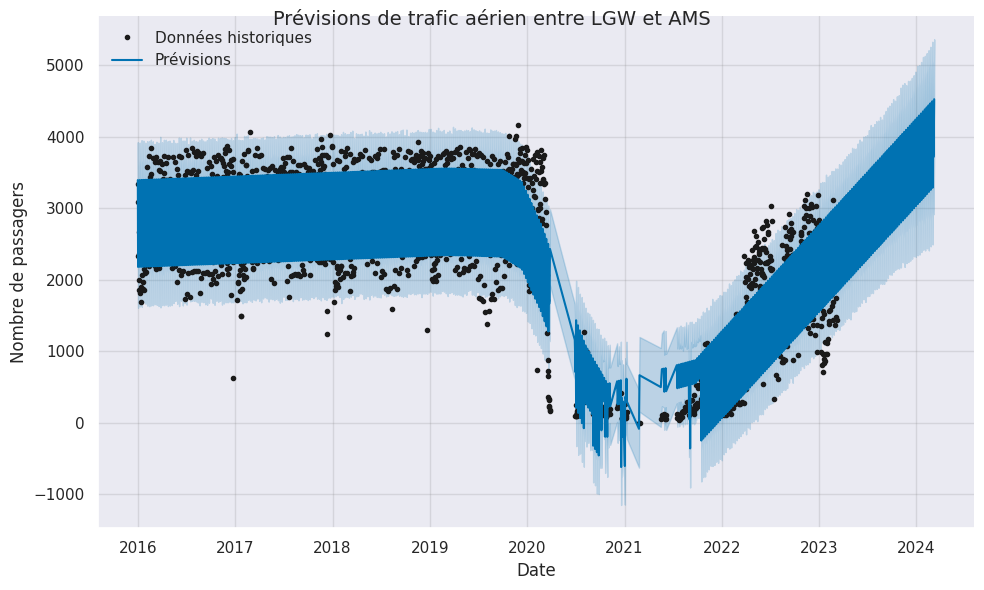

Performance Metrics:
      horizon           mse         rmse          mae     mdape     smape  \
0    38 days  8.469809e+05   920.315644   605.737423  0.108049  0.627649   
1    39 days  8.563713e+05   925.403340   611.733598  0.108498  0.628922   
2    40 days  8.680062e+05   931.668522   614.418600  0.108049  0.628866   
3    41 days  8.744661e+05   935.128906   613.234499  0.106740  0.626480   
4    42 days  8.643900e+05   929.725740   612.884436  0.107371  0.623280   
..       ...           ...          ...          ...       ...       ...   
323 361 days  7.497315e+06  2738.122494  2001.076797  1.444401  1.059661   
324 362 days  7.546820e+06  2747.147533  2011.590610  1.460200  1.069338   
325 363 days  7.640903e+06  2764.218395  2035.389229  1.466506  1.082073   
326 364 days  7.725241e+06  2779.431816  2049.255012  1.471680  1.089376   
327 365 days  7.814766e+06  2795.490379  2064.494767  1.518109  1.094501   

     coverage  
0    0.617188  
1    0.610725  
2    0.612654  
3

In [108]:
from prophet import Prophet
import logging
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
logging.getLogger('prophet').setLevel(logging.WARNING)

# Function to extract data for the specific route
def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
    """Extract route dataframe from traffic dataframe from home airport to paired airport.
    Args:
        - traffic_df (pd.DataFrame): Traffic dataframe.
        - homeAirport (str): IATA code from home airport.
        - pairedAirport (str): IATA code from paired airport.

    Returns:
        - pd.DataFrame: Aggregated daily PAX traffic on route (home-paired).
    """
    _df = (traffic_df
           .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport, paired=pairedAirport))
           .groupby(['home_airport', 'paired_airport', 'date'])
           .agg(pax_total=('pax', 'sum'))
           .reset_index())
    return _df

# Extraction des données de la route spécifique
route_df = generate_route_df(traffic_df, "LGW", "AMS")

# Renommage des colonnes pour être compatibles avec Prophet
route_df = route_df.rename(columns={'date': 'ds', 'pax_total': 'y'})

# Optimisation du modèle
baseline_model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive',
    changepoint_prior_scale=0.05
)

# Entraînement du modèle sur les données de la route spécifique
baseline_model.fit(route_df)

# Évaluation du modèle
cv_results = cross_validation(
    baseline_model,
    initial='500 days',
    period='180 days',
    horizon='365 days'
)

performance = performance_metrics(cv_results)

# Création d'un dataframe pour les prévisions futures
future_df = baseline_model.make_future_dataframe(periods=365)

# Génération des prévisions pour la période future
forecast = baseline_model.predict(future_df)

# Affichage des prévisions
fig = baseline_model.plot(forecast)
fig.suptitle('Prévisions de trafic aérien entre LGW et AMS', fontsize=14)
ax = fig.gca()
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Nombre de passagers', fontsize=12)

# Amélioration de l'apparence du graphique
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(['Données historiques', 'Prévisions'], loc='upper left', frameon=False)

plt.show()

# Affichage des performances du modèle
print('Performance Metrics:\n', performance)


## Full Streamlit Code

In [ ]:
import pandas as pd
import streamlit as st
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from prophet import Prophet
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

image_path = 'dash.jpg'

# Afficher l'image
st.image(image_path, caption="Logo", use_column_width=True)

HOME_AIRPORTS = ('LGW', 'LIS', 'LYS', 'NTE')
PAIRED_AIRPORTS = ('FUE', 'AMS', 'ORY', 'BCN', 'OPO')

df = pd.read_parquet('src/data/traffic_10lines.parquet')

st.title('Traffic Forecaster')

# Variable de drapeau pour vérifier si le bouton "Forecast" a été cliqué
forecast_button_clicked = False

def calculate_performance(actual, predicted):
    mae = abs(actual - predicted).mean()
    rmse = ((actual - predicted) ** 2).mean() ** 0.5
    r_squared = 1 - ((actual - predicted) ** 2).sum() / ((actual - actual.mean()) ** 2).sum()
    return mae, rmse, r_squared

# Créer une instance du modèle Prophet
model_prophet = Prophet()

with st.sidebar:
    home_airport = st.selectbox('Home Airport', HOME_AIRPORTS)
    paired_airport = st.selectbox('Paired Airport', PAIRED_AIRPORTS)
    forecast_date = st.date_input('Forecast Start Date')
    nb_days = st.slider('Days of forecast', 7, 30, 1)
    model_selection = st.selectbox('Model Selection', ['Prophet', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor'])
    run_forecast_button = st.button('Forecast')

# Affichage de la table
st.write('Home Airport selected:', home_airport)
st.write('Paired Airport selected:', paired_airport)
st.write('Days of forecast:', nb_days)
st.write('Forecast Start Date:', forecast_date)

df_filtered = df[(df['home_airport'] == home_airport) & (df['paired_airport'] == paired_airport)]

# Afficher le dataframe filtré
st.dataframe(data=df_filtered, width=600, height=300)

# Filtrer les données pour le graphique initial
df_filtered_initial = df.query(
    f'home_airport == "{home_airport}" and paired_airport == "{paired_airport}"'
)
df_filtered_initial = df_filtered_initial.groupby('date').agg(pax_total=('pax', 'sum')).reset_index()

# Créer un graphique avec les données initiales
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=df_filtered_initial['date'], y=df_filtered_initial['pax_total'], fill='tozeroy',
                         name=f'{home_airport} → {paired_airport}'), row=1, col=1)

# Créer l'étiquette du graphique initial
graph_label = f"Données de la route {home_airport} → {paired_airport}"

# Mettre à jour le titre du graphique
fig.update_layout(title=graph_label)

mae = 0.0
rmse = 0.0
r_squared = 0.0
if run_forecast_button:
    forecast_button_clicked = True  # Mettre à jour le drapeau lorsque le bouton est cliqué

    df_filtered = df.query(
        f'home_airport == "{home_airport}" and paired_airport == "{paired_airport}"'
    )
    df_filtered = df_filtered.groupby('date').agg(pax_total=('pax', 'sum')).reset_index()

    forecast_dates = pd.date_range(forecast_date, periods=nb_days)  # Définir les dates de prévision ici

    if model_selection == 'Prophet':
        # Convertir forecast_date en datetime64[ns]
        forecast_date = pd.to_datetime(forecast_date)

        # Filtrer les données historiques jusqu'à la date de prévision
        df_filtered = df_filtered[df_filtered['date'] <= forecast_date]

        # Préparer les données pour Prophet
        df_prophet = df_filtered[['date', 'pax_total']].rename(columns={'date': 'ds', 'pax_total': 'y'})

        # Entraîner le modèle
        model_prophet.fit(df_prophet)

        # Prédire le trafic pour les dates de prévision
        future = pd.DataFrame({'ds': forecast_dates})
        forecast = model_prophet.predict(future)

        actual_values = df_filtered['pax_total'].values[-nb_days:]
        predicted_values = forecast['yhat'].values
        mae, rmse, r_squared = calculate_performance(actual_values, predicted_values)

        # Ajouter les données prédictives au graphique
        fig.add_trace(
            go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', line=dict(dash='dash', color='red'),
                       name='Prophet'), row=1, col=1
        )

    elif model_selection == 'LGBMRegressor':
        # Préparer les ensembles de données pour LGBMRegressor
        X_train = df_filtered['date'].values.reshape(-1, 1)
        y_train = df_filtered['pax_total'].values
        X_forecast = forecast_dates.values.reshape(-1, 1)

        # Créer une instance du modèle LGBMRegressor
        lgb_model = LGBMRegressor()
        lgb_model.fit(X_train, y_train)
        # Faire des prédictions avec LGBMRegressor
        lgb_predictions = lgb_model.predict(X_forecast)
        actual_values = df_filtered['pax_total'].values[-nb_days:]
        mae, rmse, r_squared = calculate_performance(actual_values, lgb_predictions)

        # Ajouter les données prédictives au graphique
        fig.add_trace(
            go.Scatter(x=forecast_dates, y=lgb_predictions, mode='lines', line=dict(dash='dash', color='red'),
                       name='LGBMRegressor'), row=1, col=1
        )

    elif model_selection == 'XGBRegressor':
        # Préparer les ensembles de données pour XGBRegressor
        ref_date = np.min(df_filtered['date']).to_pydatetime()
        X_train_numeric = (df_filtered['date'] - ref_date).dt.days.values.reshape(-1, 1)
        X_forecast_numeric = (forecast_dates - ref_date).days.to_numpy().reshape(-1, 1)

        y_train = df_filtered['pax_total'].values

        # Créer une instance du modèle XGBRegressor
        xgb_model = XGBRegressor()
        xgb_model.fit(X_train_numeric, y_train)

        # Faire des prédictions avec XGBRegressor
        xgb_predictions = xgb_model.predict(X_forecast_numeric)

        # Créer un dataframe pour les prévisions
        forecast_df = pd.DataFrame({'date': forecast_dates, 'pax_total': xgb_predictions})

        actual_values = df_filtered['pax_total'].values[-nb_days:]
        predicted_values = forecast_df['pax_total'].values
        mae, rmse, r_squared = calculate_performance(actual_values, predicted_values)

        # Ajouter les données prédictives au graphique
        fig.add_trace(
            go.Scatter(x=forecast_dates, y=xgb_predictions, mode='lines', line=dict(dash='dash', color='red'),
                       name='XGBRegressor'), row=1, col=1
        )

    elif model_selection == 'RandomForestRegressor':
        # Préparer les ensembles de données pour RandomForestRegressor
        ref_date = np.min(df_filtered['date']).to_pydatetime()
        X_train_numeric = (df_filtered['date'] - ref_date).dt.days.values.reshape(-1, 1)
        X_forecast_numeric = (forecast_dates - ref_date).days.to_numpy().reshape(-1, 1)

        y_train = df_filtered['pax_total'].values

        # Créer une instance du modèle RandomForestRegressor
        rf_model = RandomForestRegressor()
        rf_model.fit(X_train_numeric, y_train)

        # Faire des prédictions avec RandomForestRegressor
        rf_predictions = rf_model.predict(X_forecast_numeric)

        # Créer un dataframe pour les prévisions
        forecast_df = pd.DataFrame({'date': forecast_dates, 'pax_total': rf_predictions})

        actual_values = df_filtered['pax_total'].values[-nb_days:]
        predicted_values = forecast_df['pax_total'].values
        mae, rmse, r_squared = calculate_performance(actual_values, predicted_values)

        # Ajouter les données prédictives au graphique
        fig.add_trace(
            go.Scatter(x=forecast_dates, y=rf_predictions, mode='lines', line=dict(dash='dash', color='red'),
                       name='RandomForestRegressor'), row=1, col=1
        )

    # Mettre à jour le titre du graphique avec les performances
    graph_label += f"<br>MAE: {mae:.2f} | RMSE: {rmse:.2f} | R^2: {r_squared:.2f}"
    fig.update_layout(title=graph_label)

# Afficher le graphique
st.plotly_chart(fig)

# Measure and Improvement of the model

In [109]:
baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df,"NTE", "FUE").rename(columns={'date':'ds', 'pax_total':'y'}))

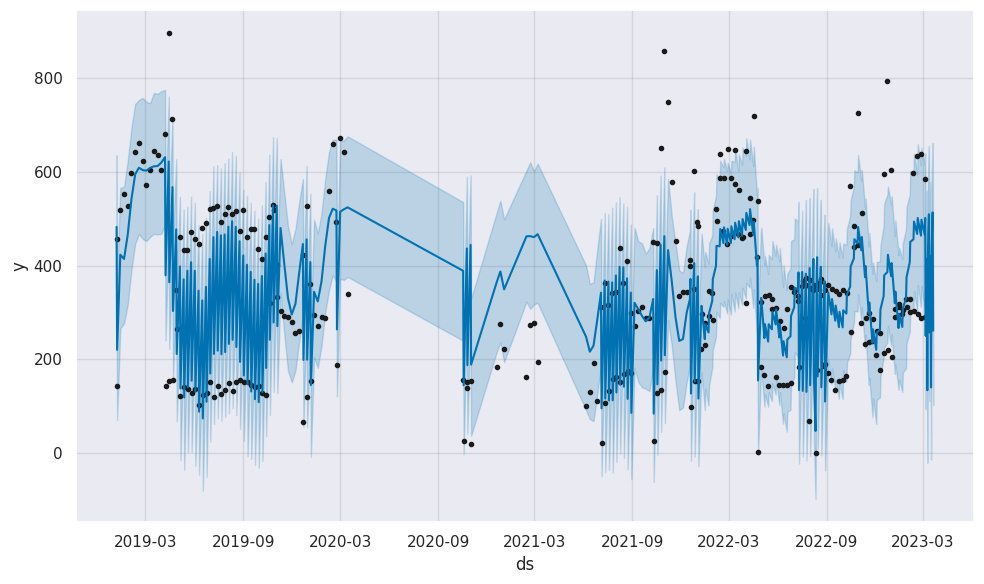

In [110]:

baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df,"NTE", "FUE").rename(columns={'date':'ds', 'pax_total':'y'}))

future_df = baseline_model.make_future_dataframe(periods=15)   #prepare to predict 15 days
future_df

forecast_df = baseline_model.predict(future_df)

baseline_model.plot(forecast_df);


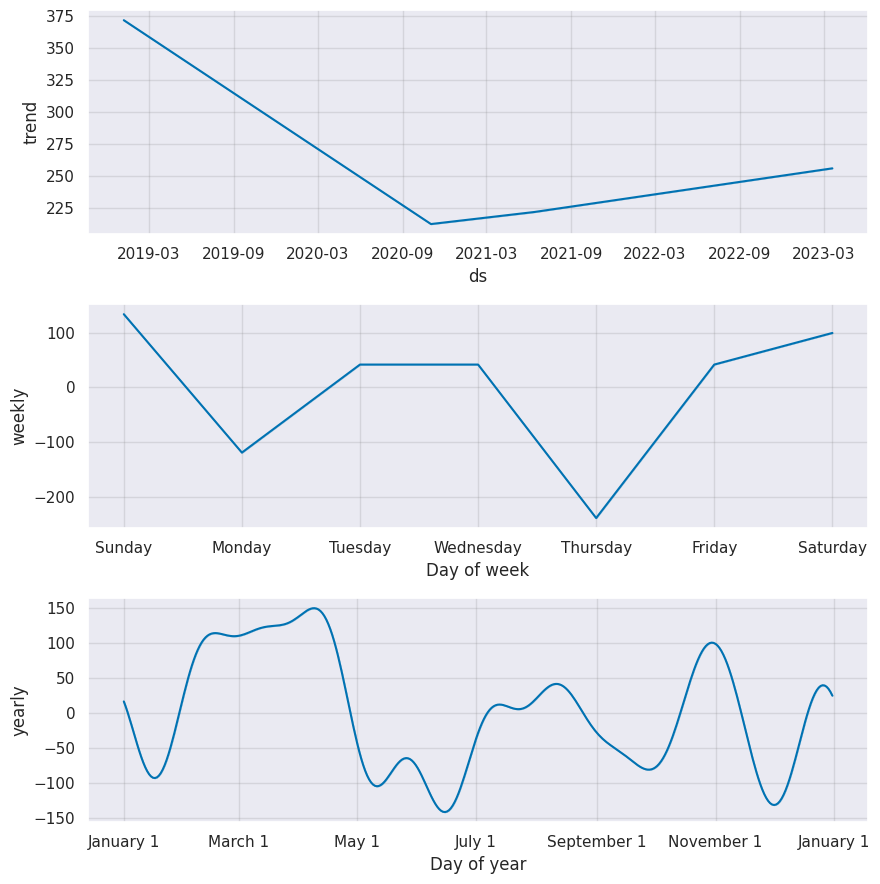

In [111]:

baseline_model.plot_components(forecast_df);

## Performance

- **Metric**: Either root mean squared error (RMSE, the sum of the square of the difference between y and y_hat) or mean absolute percentage error (MAPE, the absolute value of the difference between y and y_hat divided by y).

- **Procedure**: Cross-validation is not applicable to time series data because it breaks the time series. Instead, we use time split cross-validation.


In [112]:
from prophet.diagnostics import cross_validation

In [113]:
eval_df=cross_validation(baseline_model,initial='366 days' ,period= '90 days', horizon='90 days')

  0%|          | 0/10 [00:00<?, ?it/s]

In [114]:
from prophet.diagnostics import performance_metrics

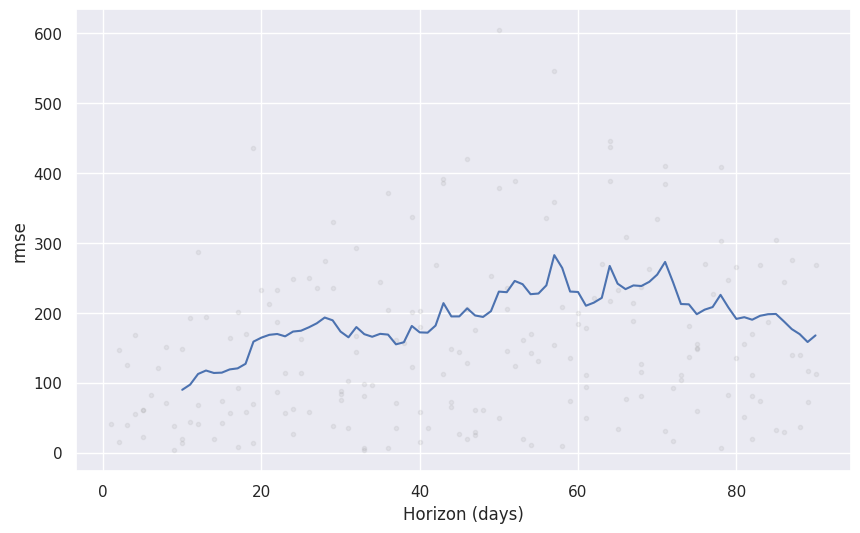

In [115]:
from prophet.plot import plot_cross_validation_metric

## Evaluate performance
plot_cross_validation_metric(eval_df,metric='rmse');

## Improvement of Prophet mpodel (hyperparameters optimization)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Best Parameters:
{'changepoint_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


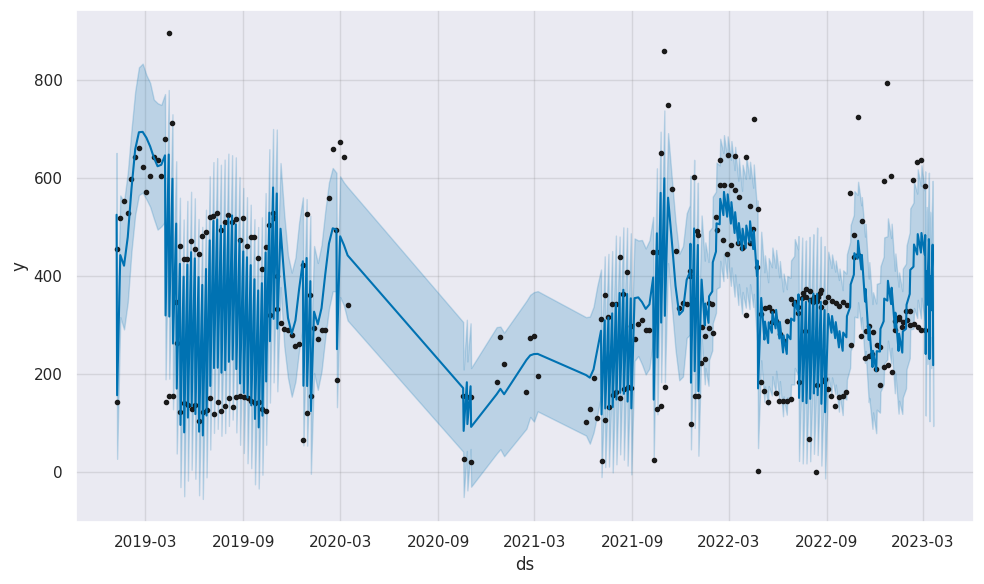

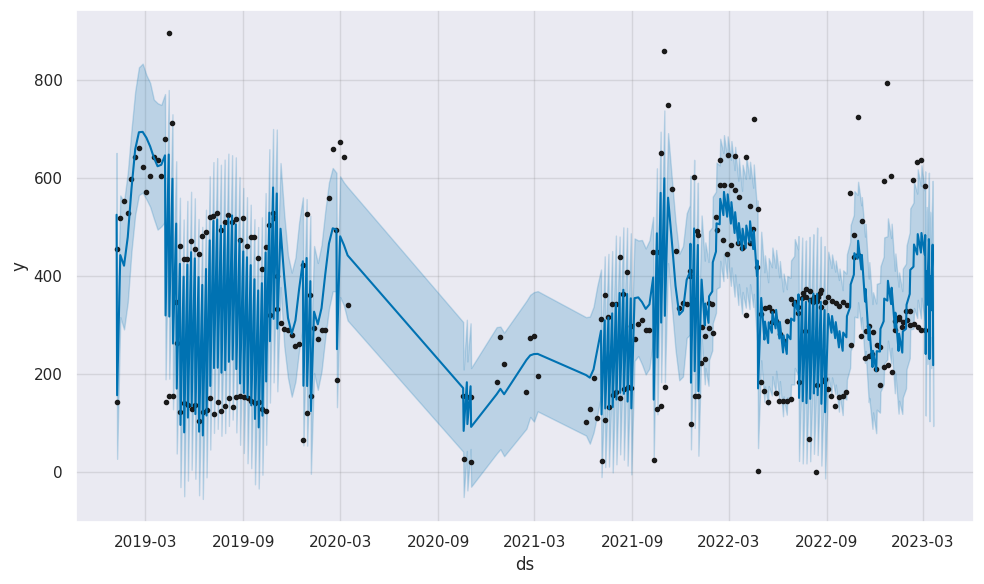

In [116]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid

# Function to evaluate Prophet model with given parameters
def evaluate_prophet_model(params):
    model = Prophet(**params)
    model.fit(generate_route_df(traffic_df, "NTE", "FUE").rename(columns={'date': 'ds', 'pax_total': 'y'}))
    cv_results = cross_validation(model, initial='366 days', period='90 days', horizon='90 days')
    performance = performance_metrics(cv_results)
    rmse = performance['rmse'].values[0]
    return rmse

# Define parameter grid for optimization
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [0.01, 0.1, 1.0]
}

# Perform grid search to find best parameters
best_rmse = float('inf')
best_params = None

for params in ParameterGrid(param_grid):
    rmse = evaluate_prophet_model(params)
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print the best parameters
print("Best Parameters:")
print(best_params)


# Create and fit the Prophet model with the best parameters
model = Prophet(**best_params)
model.fit(generate_route_df(traffic_df, "NTE", "FUE").rename(columns={'date': 'ds', 'pax_total': 'y'}))

# Make future predictions
future_df = model.make_future_dataframe(periods=15)
forecast_df = model.predict(future_df)

# Plot the forecast
model.plot(forecast_df, xlabel='ds', ylabel='y')


  0%|          | 0/10 [00:00<?, ?it/s]

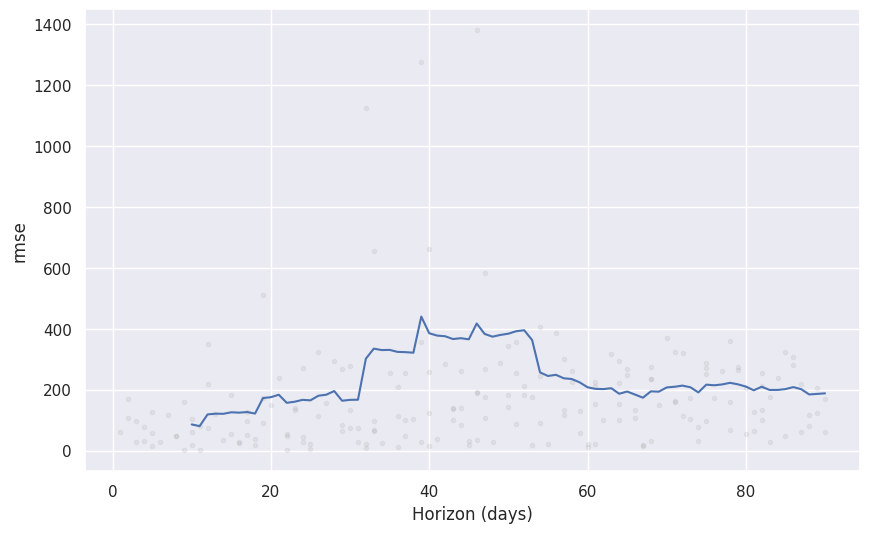

In [117]:
eval_model=cross_validation(model,initial='366 days' ,period= '90 days', horizon='90 days')
## Evaluate performance
plot_cross_validation_metric(eval_model,metric='rmse');

In [118]:
# Perform cross-validation and plot the RMSE metric
cv_results = cross_validation(model, initial='366 days', period='90 days', horizon='90 days')
performance = performance_metrics(cv_results)#.rename(columns={'horizon': 'ds'})

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterGrid

# Function to evaluate Prophet model with given parameters
def evaluate_prophet_model(params):
    model = Prophet(**params)
    model.fit(generate_route_df(traffic_df, "LGW", "AMS").rename(columns={'date': 'ds', 'pax_total': 'y'}))
    cv_results = cross_validation(model, initial='366 days', period='90 days', horizon='90 days')
    performance = performance_metrics(cv_results)
    rmse = performance['rmse'].values[0]
    return rmse

# Define parameter grid for optimization
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [0.01, 0.1, 1.0]
}

# Perform grid search to find best parameters
best_rmse = float('inf')
best_params = None

for params in ParameterGrid(param_grid):
    rmse = evaluate_prophet_model(params)
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print the best parameters
print("Best Parameters:")
print(best_params)





  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Best Parameters:
{'changepoint_prior_scale': 1.0, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


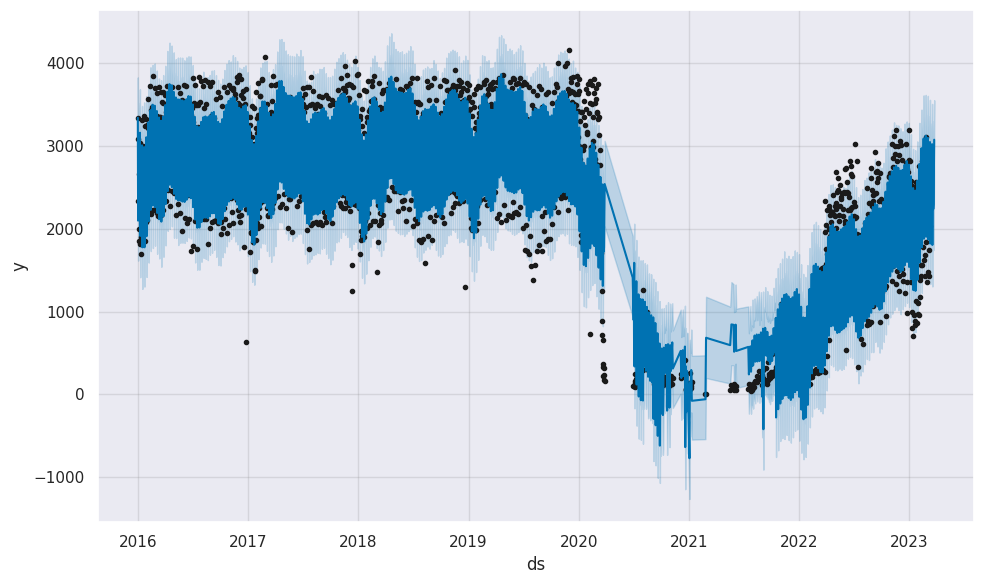

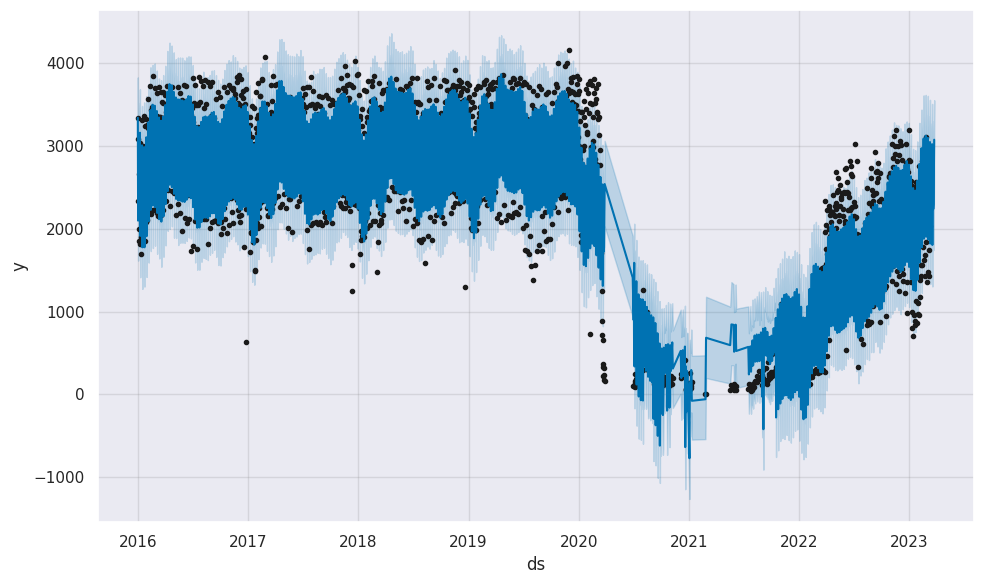

In [119]:
# Create and fit the Prophet model with no parameters specified
model_simple = Prophet()
model_simple.fit(generate_route_df(traffic_df, "LGW", "AMS").rename(columns={'date': 'ds', 'pax_total': 'y'}))

# Make future predictions
future_df = model_simple.make_future_dataframe(periods=15)
forecast_df = model_simple.predict(future_df)

# Plot the forecast
model_simple.plot(forecast_df, xlabel='ds', ylabel='y')


  0%|          | 0/25 [00:00<?, ?it/s]

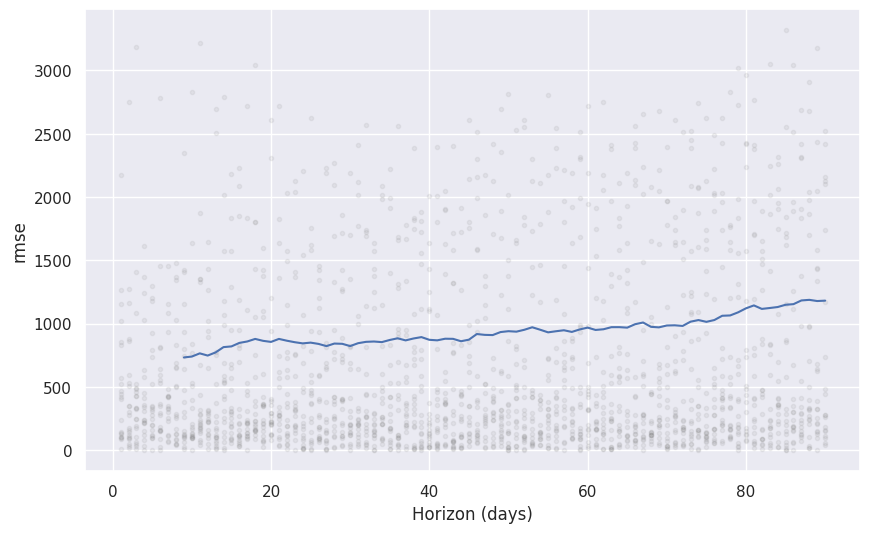

In [120]:
eval_model_simple=cross_validation(model_simple,initial='366 days' ,period= '90 days', horizon='90 days')
## Evaluate performance
plot_cross_validation_metric(eval_model_simple,metric='rmse');

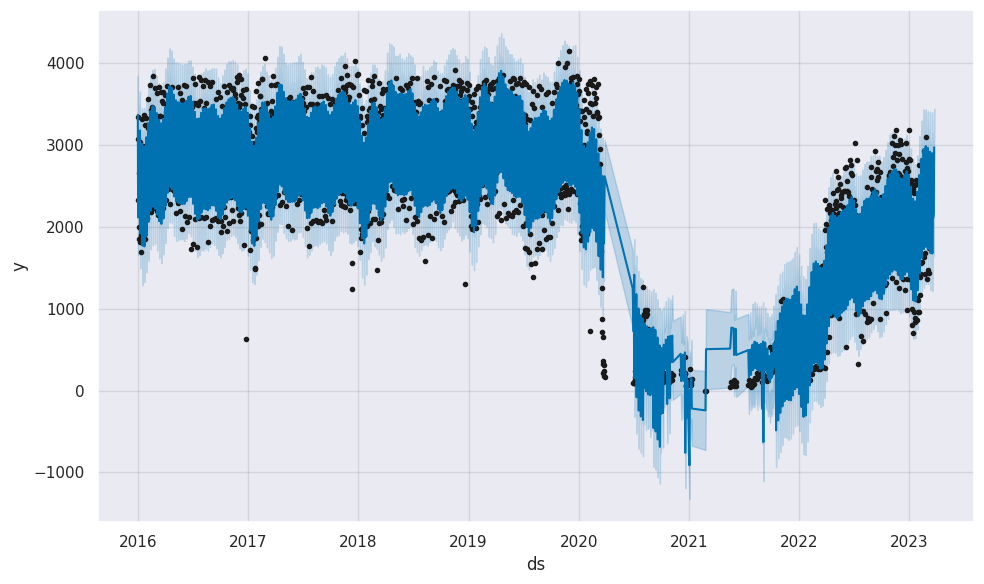

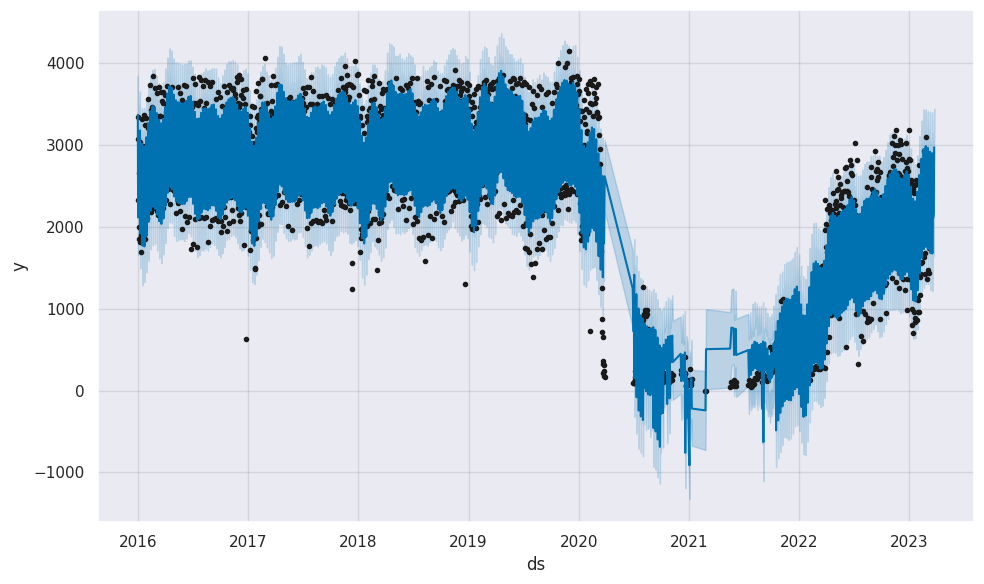

In [121]:

# Create and fit the Prophet model with the best parameters
model_improved = Prophet(**best_params)
model_improved.fit(generate_route_df(traffic_df, "LGW", "AMS").rename(columns={'date': 'ds', 'pax_total': 'y'}))

# Make future predictions
future_df = model_improved.make_future_dataframe(periods=15)
forecast_df = model_improved.predict(future_df)

# Plot the forecast
model_improved.plot(forecast_df, xlabel='ds', ylabel='y')

  0%|          | 0/25 [00:00<?, ?it/s]

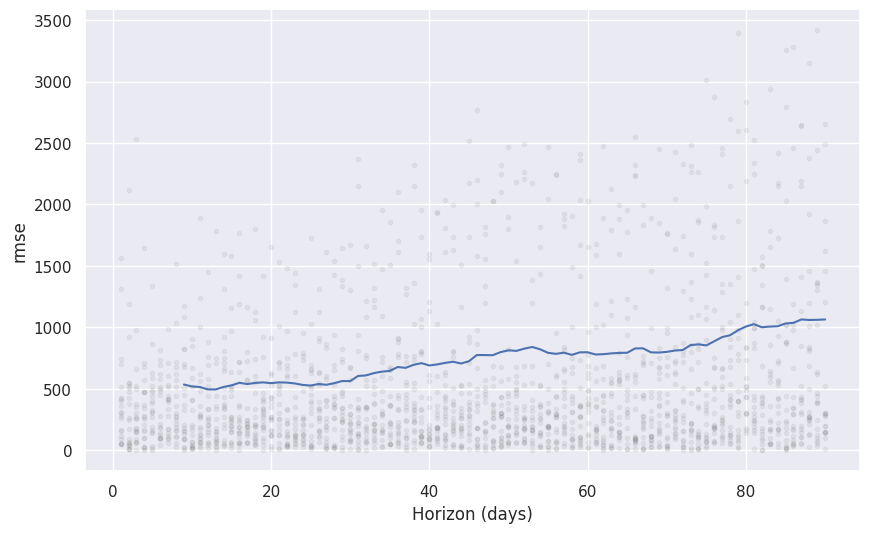

In [122]:
eval_model_improved=cross_validation(model_improved,initial='366 days' ,period= '90 days', horizon='90 days')
## Evaluate performance
plot_cross_validation_metric(eval_model_improved,metric='rmse');

To enhance model training, we have conducted hyperparameter optimization. However, the outcomes remain inconclusive. The optimal approach would be to expand the number of hyperparameters assessed.

# Nixtia lirary Models

## LGBM
**Light Gradient Boosting Machine (LGBMRegressor)**
LGBMRegressor is a tree-based ensemble method that combines gradient boosting with regularization techniques. It is known for its high accuracy and performance, especially on high-dimensional data.

**Gradient Boosting**:
Gradient boosting is an ensemble method that iteratively builds an additive model, where new models are added to correct the errors of the previous models. LGBMRegressor uses a gradient descent algorithm to minimize the loss function, which is the difference between the predicted values and the actual values.

**L2 Regularization**:
L2 regularization, a technique used to prevent overfitting, involves penalizing the sum of the squares of the model coefficients. Overfitting occurs when the model fits the training data too closely and performs poorly on new data. LGBMRegressor primarily uses L2 regularization to control the complexity of the model and improve its generalization ability.

**Mathematical Formula**:
The objective function of LGBMRegressor is to minimize the following loss function:

\begin{align*}
L = \sum_{i=1}^n l(y_i, \hat{y}_i) + \lambda \sum_{j=1}^p w_j^2
\end{align*}

where:
- $y_i$ is the actual value of the ith data point.
- $\hat{y}_i$ is the predicted value of the ith data point.
- $l(y_i, \hat{y}_i)$ is the loss function for the ith data point.
- $w_j$ is the weight of the $j$th feature.
- $\lambda$ is the regularization parameter.



## XGB
**Extreme Gradient Boosting (XGBRegressor)**

XGBRegressor is another tree-based ensemble method that is similar to LGBMRegressor. It combines gradient boosting with regularization and is known for its speed and efficiency.

**Tree Structure**:
XGBoost uses a specific tree structure called a gbtree tree. This tree structure has several advantages, including:

- **Sparsity**: XGBRegressor can handle sparse data efficiently, which is common in many real-world applications.
- **Regularization**: XGBRegressor uses a sophisticated regularization strategy that includes both L1 and L2 regularization, which can further improve its generalization ability.

**Mathematical Formula**:
The objective function of XGBRegressor, incorporating both L1 and L2 regularization, is as follows:

\begin{align*}
L = \sum_{i=1}^n l(y_i, \hat{y}_i) + \lambda_1 \sum_{j=1}^p |w_j| + \lambda_2 \sum_{j=1}^p w_j^2
\end{align*}

where:
- $y_i$ is the actual value of the ith data point.
- $\hat{y}_i$ is the predicted value of the ith data point.
- $l(y_i, \hat{y}_i)$ is the loss function for the ith data point.
- $w_j$ is the weight of the $j$th feature.
- $\lambda_1$ and $\lambda_2$ are the L1 and L2 regularization parameters, respectively.


## Random Forest

Random Forest Regressor is an ensemble method that utilizes decision trees. It is based on the concept of constructing multiple decision trees and then averaging their predictions. This can help to mitigate overfitting and enhance the overall accuracy of the model.

**Tree Structure**:

Random Forest Regressor employs a standard decision tree structure. Nonetheless, it injects randomness by employing a random subset of features for each tree and by pruning the trees to prevent overfitting.

**Mathematical Formula**:

The objective function of Random Forest Regressor is simply the mean squared error (MSE):

\begin{align*}
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{align*}

where:
- $y_i$ is the actual value of the ith data point
- $\hat{y}_i$ is the predicted value of the ith data point
- $n$ is the training sample


In [91]:
!pip install mlforecast &> /dev/null

In [38]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from mlforecast import MLForecast

from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]



@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14,21,28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek']
)


In [39]:
nixtia_model=fcst.fit(generate_route_df(traffic_df,"LGW", "AMS").drop(columns=['paired_airport']),id_col='home_airport',time_col='date',target_col='pax_total')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 2214, number of used features: 7
[LightGBM] [Info] Start training from score 2388.147245


In [40]:
predict_df= nixtia_model.predict(30)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           LGW 2023-03-10    2719.714420   2819.989014                2727.83
1           LGW 2023-03-11    1557.936484   1394.119629                1505.21
2           LGW 2023-03-12    2674.980701   2877.711914                2652.39
3           LGW 2023-03-13    1858.453276   1723.447876                1849.79
4           LGW 2023-03-14    1692.542503   1601.532837                1718.40
5           LGW 2023-03-15    1610.707798   1441.242065                1556.84
6           LGW 2023-03-16    2103.353291   2344.066650                1932.16
7           LGW 2023-03-17    2539.876428   2869.955322                2684.60
8           LGW 2023-03-18    1601.613722   1430.562134                1488.79
9           LGW 2023-03-19    2629.308303   2836.561768                2660.31
10          LGW 2023-03-20    1677.615375   1687.698120                1687.66
11          LGW 2023-03-21    1601.854858   1578.633667                1712.94
12          LGW 2023-03-22    1623.717619   1301.783325                1581.12
13          LGW 2023-03-23    2085.005191   2221.727539                1770.26
14          LGW 2023-03-24    2496.853016   2758.806396                2621.20
15          LGW 2023-03-25    1603.942583   1385.037109                1487.35
16          LGW 2023-03-26    2303.968644   2264.338623                2573.38
17          LGW 2023-03-27    1589.211329   1861.903198                1675.54
18          LGW 2023-03-28    1568.825382   1733.261597                1629.92
19          LGW 2023-03-29    1600.139408   1398.228271                1661.76
20          LGW 2023-03-30    1894.352023   2235.463623                1611.83
21          LGW 2023-03-31    2410.768326   2584.479736                2597.44
22          LGW 2023-04-01    1643.679057   1377.657471                1473.21
23          LGW 2023-04-02    2333.116055   2421.430664                2546.73
24          LGW 2023-04-03    1689.073103   1886.954834                1775.65
25          LGW 2023-04-04    1629.103702   1570.078491                1725.25
26          LGW 2023-04-05    1602.865561   1411.313477                1750.51
27          LGW 2023-04-06    2140.175941   2225.356445                1679.35
28          LGW 2023-04-07    2630.171381   2575.016846                2593.86
29          LGW 2023-04-08    1721.802812   1424.254028                1490.99

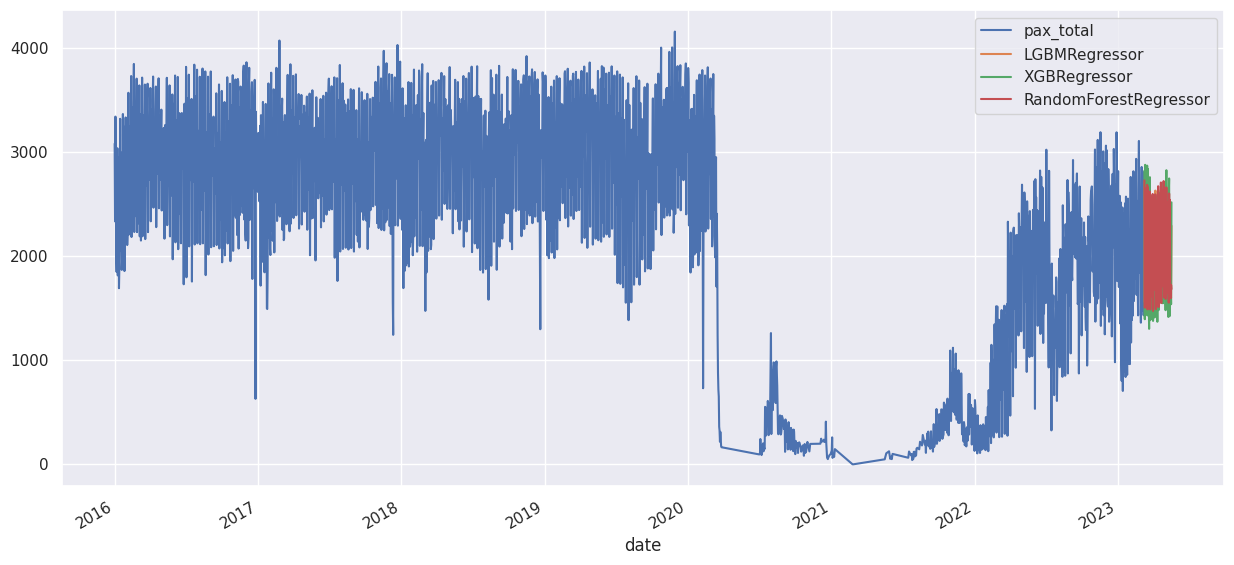

In [41]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtia_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [42]:
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
from typing import Union, List, Optional

def draw_ts_multiple(df: pd.DataFrame, v1: Union[str, List[str]], v2: Optional[str] = None,
                     prediction: Optional[str] = None, date: str = 'date',
                     secondary_y: bool = True, covid_start: Optional[str] = None,
                     covid_end: Optional[str] = None, display: bool = True,
                     moving_avg_window: Optional[int] = None) -> go.Figure:
    """
    Draw time series on multiple y axes, with COVID period option.

    Args:
    - df (pd.DataFrame): Time series dataframe (one line per date, series in columns).
    - v1 (str or list[str]): Name or list of names of the series to plot on the first y-axis.
    - v2 (str): Name of the series to plot on the second y-axis (default: None).
    - prediction (str): Name of the predicted series displayed with a dotted line (default: None).
    - date (str): Name of the date column (default: 'date').
    - secondary_y (bool): Use a secondary y-axis if v2 is used (default: True).
    - covid_start (str): Start date of the COVID-19 period (default: None).
    - covid_end (str): End date of the COVID-19 period (default: None).
    - display (bool): Display the figure (default: True).
    - moving_avg_window (int): Window size for computing the moving average (default: None).

    Returns:
    - fig (plotly.graph_objs._figure.Figure): Plotly figure.

    Notes:
    Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
    Or use `display=False`.
    """
    if isinstance(v1, str):
        v1 = [v1]
    v1_series_names = [f'{v} (V1)' for v in v1]  # Improved series naming
    v2_series_name = f'{v2} (V2)' if v2 else None

    # Enhanced layout configuration
    layout = {
        'title': ' & '.join(v1_series_names + [v2_series_name] if v2 else v1_series_names),
        'xaxis': {
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 3, 'label': '3m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 8, 'label': '8m', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 12, 'label': '1Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 24, 'label': '2Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 36, 'label': '3Y', 'step': 'month', 'stepmode': 'backward'},
                    {'count': 58, 'label': '4Y', 'step': 'month', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            'rangeslider': {'visible': True},
            'type': 'date'
        }
    }

    fig = make_subplots(specs=[[{"secondary_y": secondary_y}]], shared_xaxes=True)
    fig.update_layout(layout)

    # Adding traces for v1 series
    for i, v in enumerate(v1):
        fig.add_trace(go.Scatter(x=df[date], y=df[v], name=v1_series_names[i]), secondary_y=False)

        # Adding moving average and bounds if applicable
        if moving_avg_window:
            # Compute moving average and standard deviation
            moving_avg = df[v].rolling(window=moving_avg_window, min_periods=1).mean()
            std = df[v].rolling(window=moving_avg_window, min_periods=1).std()
            upper_bound = moving_avg + 2 * std
            lower_bound = moving_avg - 2 * std

            fig.add_trace(go.Scatter(x=df[date], y=moving_avg, name=f'{v} Moving Avg.'), secondary_y=False)
            fig.add_trace(go.Scatter(x=df[date], y=upper_bound, name=f'{v} Upper Bound', line={'dash': 'dash'}), secondary_y=False)
            fig.add_trace(go.Scatter(x=df[date], y=lower_bound, name=f'{v} Lower Bound', line={'dash': 'dash'}), secondary_y=False)

    # Adding v2 series if provided
    if v2:
        fig.add_trace(go.Scatter(x=df[date], y=df[v2], name=v2_series_name), secondary_y=secondary_y)

    # Adding prediction series if provided
    if prediction:
        fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name=f'Prediction: {prediction}', line={'dash': 'dot'}), secondary_y=False)

    # Highlighting COVID period if specified
    if covid_start and covid_end:
        fig.add_vrect(x0=pd.Timestamp(covid_start), x1=pd.Timestamp(covid_end),
                      fillcolor='Gray', opacity=0.5, layer='below', line_width=0)

    # Display the figure if required
    if display:
        pyoff.iplot(fig)

    return fig


df1 = (pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtia_model.predict(7*10)]).set_index('date').reset_index())
df1

# Chart configuration
date_column = 'date'
passenger_column = 'pax_total'
title = 'Passenger Traffic LGW-AMS'
covid_period = ('2020-03-01', '2022-01-30')
line_colors = ['#ff7f0e']
line_width = 2
marker_size = 6
x_label = 'Date'
legend_labels = ['Nombre de passager']
LGBMRegressor	="LGBMRegressor"
XGBRegressor	="XGBRegressor"
RandomForestRegressor= "RandomForestRegressor"


# Generate the chart
fig = draw_ts_multiple(df1, v1=passenger_column, date=date_column, v2=None,
                       prediction=LGBMRegressor, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)




In [43]:
# Generate the chart
fig = draw_ts_multiple(df1, v1=passenger_column, date=date_column, v2=None,
                       prediction=XGBRegressor, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)


In [44]:

# Generate the chart
fig = draw_ts_multiple(df1, v1=passenger_column, date=date_column, v2=None,
                       prediction=RandomForestRegressor, secondary_y=False, covid_start=covid_period[0],
                       covid_end=covid_period[1], display=True, moving_avg_window=7)

In [ ]:
crossvalidation_df = fcst.cross_validation(
    generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    90,
    5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

In [52]:
!pip install datasetsforecast  &> /dev/null

In [53]:
crossvalidation_df

home_airport       date     cutoff  pax_total  LGBMRegressor  \
0            LGW 2021-12-15 2021-12-14      229.0     247.388358   
1            LGW 2021-12-16 2021-12-14      429.0     333.465729   
2            LGW 2021-12-17 2021-12-14      676.0     375.507521   
3            LGW 2021-12-18 2021-12-14      286.0     274.401623   
4            LGW 2021-12-19 2021-12-14      676.0     448.453006   
..           ...        ...        ...        ...            ...   
445          LGW 2023-03-05 2023-03-04     2815.0    2452.183229   
446          LGW 2023-03-06 2023-03-04     1916.0    1841.078394   
447          LGW 2023-03-07 2023-03-04     1741.0    1777.125183   
448          LGW 2023-03-08 2023-03-04     1432.0    1478.742654   
449          LGW 2023-03-09 2023-03-04     2029.0    2371.444969   

     XGBRegressor  RandomForestRegressor  
0      317.593872                 260.25  
1      464.477417                 326.30  
2      447.999268                 327.45  
3      257.275391                 261.68  
4      457.650269                 339.90  
..            ...                    ...  
445   2558.197510                2477.43  
446   1760.491577                1905.48  
447   1744.941040                1849.59  
448   1443.071411                1456.45  
449   2312.588135                2367.39  

[450 rows x 7 columns]

In [87]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  return np.sqrt(mse(y, y_hat))



In [88]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)

cv_rmse = (crossvalidation_df
           .assign(Ensemble=lambda _df: _df[['LGBMRegressor', 'RandomForestRegressor', 'XGBRegressor']].mean(axis=1))
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation: ", cv_rmse)

LGBM RMSE using cross-validation:  355.1064065857528
RandomForest RMSE using cross-validation:  353.66954542826426
XGBoost RMSE using cross-validation:  378.87078234993226
Ensemble RMSE using cross-validation:  349.00453507143754


# Neuralforecast library Model

## NBEATS
**Neural basis expansion autoregressive time series (N-BEATS)** is a deep learning model for time series forecasting. It is based on the idea of combining autoregression (AR) with neural networks to capture long-term dependencies in time series data.

**Autoregressive (AR) model**:
An AR model is a statistical model that assumes that the current value of a time series is linearly related to its past values. The AR model can be represented by the following equation:

\begin{align*}
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \varepsilon_t
\end{align*}

where:
- $y_t$ is the value of the time series at time $t$
- $c$ is the intercept term
- $\phi_1, \phi_2, ..., \phi_p$ are the AR coefficients
- $\varepsilon_t$ is the error term

**Neural Basis Expansion (NBE)**:
The NBE is a way of representing time series data using a set of basis functions. The basis functions can be chosen to be non-linear, which allows the NBE to capture complex patterns in the data.

**N-BEATS model**:
The N-BEATS model combines the AR model with the NBE. The model first transforms the time series data into a latent space using the NBE. Then, it uses an AR model to model the latent values. Finally, it transforms the latent values back to the original time series space.

**Mathematical Formula**:
The objective function of the N-BEATS model is to minimize the following loss function:

\begin{align*}
L = \sum_{t=1}^T (y_t - \hat{y}_t)^2
\end{align*}

where:
- $y_t$ is the observed value of the time series at time $t$
- $\hat{y}_t$ is the predicted value of the time series at time $t$



## NHITS
**Neural hierarchical temporal state (NHITS)** is another deep learning model for time series forecasting. It is based on the idea of using a hierarchical structure to capture the temporal dependencies in the data.

**Hierarchical structure**:
The NHITS model uses a hierarchical structure that consists of three layers:
- Input layer: The input layer receives the time series data.
- Recurrent layer: The recurrent layer is a recurrent neural network (RNN) that processes the input data and generates a sequence of latent values.
- Output layer: The output layer is a feedforward neural network that maps the latent values to the predicted values.

**Mathematical Formula**:
The objective function of the NHITS model is to minimize the following loss function:

\begin{align*}
L = \sum_{t=1}^T (y_t - \hat{y}_t)^2
\end{align*}

where:
- $y_t$ is the observed value of the time series at time $t$
- $\hat{y}_t$ is the predicted value of the time series at time $t$


In [56]:
!pip install neuralforecast  &> /dev/null

In [60]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]

nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [61]:
nforecast

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='ds'>

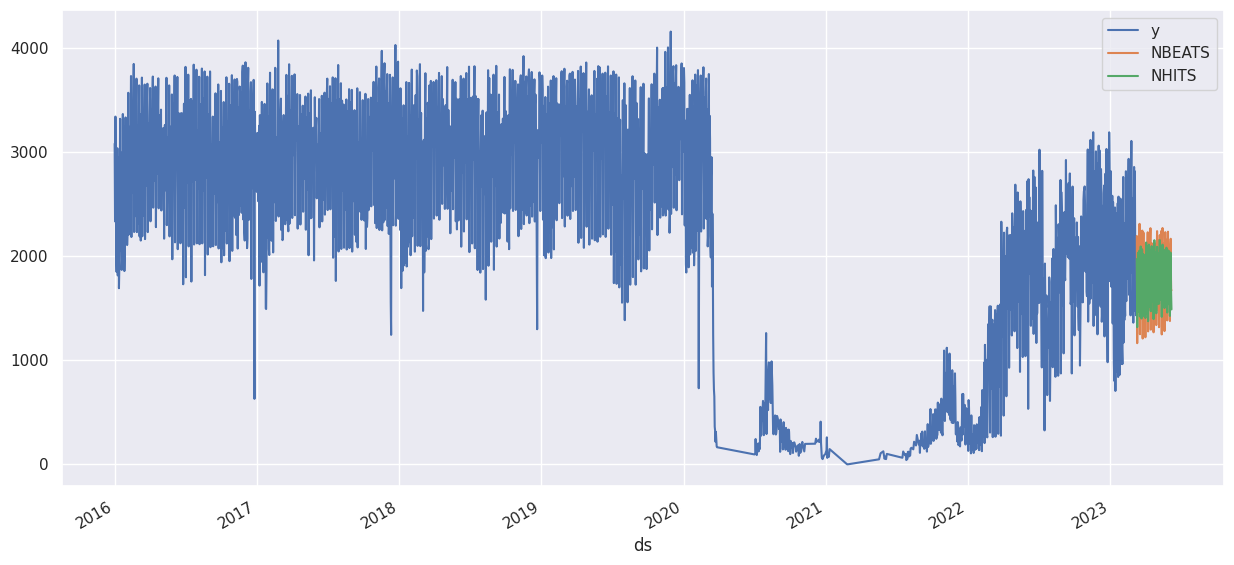

In [92]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))